# Logistic Regression From Scratch with Full Batch,Mini Batch Gradient Descent and Stochastic Gradient Ascent 

In this notebook three Logistic Regression models with Full Batch, Mini Batch Gradient descent and Stochastic Gradient Ascent are implemented from scratch using numpy and pandas only. All three training methods are combined with different learning rates and the results are evaluated.

Finally the best performing model (among the models with different training methods and learning rates) is used to compare the difference INITIAL WEIGHT DISTRIBUTIONS such as Normal, Uniform, and All-Zeros.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Needed functions to train and evaluate our Logistic Regression Models

In [2]:
def p1(x):
    return np.exp(x)/(1+np.exp(x))

def MinMaxScale(ar):
    return (ar - np.min(ar))/(np.max(ar) - np.min(ar))
def Py(x,w):
    x_ = x.dot(w[1:])
    x_ = np.exp(w[0] + x_)
    x_[np.isinf(x_)] = 10^8
    x_[np.isnan(x_)] = 10^8
    x_ = x_/(1+x_)
    return x_.reshape((x_.shape[0],1))

def grad(x,w,y):
    x_0 = np.concatenate((np.ones((x.shape[0],1)),x), axis = 1)
    return np.sum((x_0*(y - Py(x,w))),axis = 0)

def test(x,y,w): 
    predictions = p1(np.sum(x  * w[1:], axis = 1) + w[0]) #p1(np.sum(MinMaxScale(x)  * w[1:], axis = 1) + w[0])
    return np.concatenate((predictions.reshape((predictions.shape[0],1)), y.reshape((y.shape[0],1))), axis = 1)

def evaluate(x,y,w):
    result = test(x,y,w)
    result[result > 0.5] = 1
    result[result <= 0.5] = 0
    
    acc = (result[:,0] == result[:,1]).sum() / result.shape[0]
    positive_pred = result[result[:,0] == 1]
    tp = positive_pred[positive_pred[:,1] == 1].shape[0]
    fp = positive_pred[positive_pred[:,1] == 0].shape[0]
    negative_pred = result[result[:,0] == 0]
    fn = negative_pred[negative_pred[:,1] == 1].shape[0]
    tn = negative_pred[negative_pred[:,1] == 0].shape[0]
    
    if tp+fp != 0 and tp+fn != 0:
        precission = tp/(tp+fp)
        recall = tp/(tp+fn)
        F05 = 1.25*precission * recall /(0.25* precission + recall)
        F1 = 2* precission * recall /(recall + precission)
        F2 = tp/(tp + 0.2*fp + 0.8*fn)
        print("Accuracy: ", acc)
        print("Precission: ", precission)
        print("Recall: ", recall)
        print("F0.5: ", F05)
        print("F1: ", F1)
        print("F2: ", F2)   
    elif tp + fp == 0:
        print("Metrics Could not found. No Positive Prediction led to Division by Zero")
    elif tp + fn == 0:
        print("Metrics Could not found. No True Positive Prediction or False Negative led to Division by Zero")
    conf = np.array([[tp,fp],[fn,tn]])
    return conf

In [3]:
epochs = 40
x_train = pd.read_csv("q2_train_samples.csv")
y_train = pd.read_csv("q2_train_labels.csv")

In [4]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,116067.0,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.424608,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,65.00
1,141586.0,-0.776900,1.333403,-0.039016,-0.240686,0.634192,-0.424639,0.783434,0.005889,-0.167518,...,0.267100,-0.299937,-0.524720,-0.121048,-0.740192,-0.471140,0.347458,0.078488,-0.026610,8.90
2,129741.0,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,-1.433554,...,0.031795,0.143177,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1.00
3,73408.0,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,...,0.011557,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48
4,44348.0,-0.356236,1.088176,1.181898,-0.133526,0.256354,-0.468200,0.608542,0.088194,-0.649931,...,0.139289,-0.233321,-0.627183,-0.072905,-0.044656,-0.143651,0.074407,0.242738,0.084874,1.98


In [5]:
y_train.head()

,Class
0,1
1,0
2,1
3,1
4,0


In [6]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_train = np.apply_along_axis(MinMaxScale,0,x_train)

In [7]:
x_test = pd.read_csv("q2_test_samples.csv")
y_test = pd.read_csv("q2_test_labels.csv")

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

x_test = np.apply_along_axis(MinMaxScale,0,x_test)

## Full Batch Gradient Descent with Different Learning Rates

In [10]:
l = [1, 0.5, 0.05, 0.005] 
params = dict(zip(l, [0,0,0,0,0]))
for lr in l:
    w = np.random.normal(0,0.01,x_train.shape[1] + 1)
    for _ in range(epochs):
        w = w + lr * grad(x_train,w,y_train)
    params[lr] = w 

<ipython-input-2-3abfc7cd4bce>:8: RuntimeWarning: overflow encountered in exp
  x_ = np.exp(w[0] + x_)


### Evaluation of Full Batch Gradient Descent with different Learning Rates

In [11]:
for lr in l:
    print("-----------")
    print("Accuracy Metrics and Confusion Matrix for Learning Rate of" , lr)
    print(evaluate(x_test,y_test,params[lr]))
    print("\n")

-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 1
Accuracy:  0.5596330275229358
Precission:  0.4444444444444444
Recall:  0.2222222222222222
F0.5:  0.37037037037037035
F1:  0.2962962962962963
F2:  0.24691358024691354
[[  4   5]
 [ 14 118]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.5
Accuracy:  0.24770642201834864
Precission:  0.15841584158415842
Recall:  0.8888888888888888
F0.5:  0.18957345971563982
F1:  0.26890756302521013
F2:  0.4624277456647399
[[16 85]
 [ 2 38]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.05
Accuracy:  0.8990825688073395
Precission:  0.9864864864864865
Recall:  0.776595744680851
F0.5:  0.9358974358974359
F1:  0.8690476190476191
F2:  0.8111111111111111
[[ 73   1]
 [ 21 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.005
Accuracy:  0.7614678899082569
Precission:  0.9772727272727273
Recall:  0.4574468085106383
F0.5:  0.7962962962962964
F1:  0.62318840

<ipython-input-2-3abfc7cd4bce>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/(1+np.exp(x))
<ipython-input-2-3abfc7cd4bce>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/(1+np.exp(x))


### Part 2

## Mini Batch Gradient Descent with Different Learning Rates

In [10]:
batch_size = 32
l = [0.009,0.05, 0.1,0.3,1] 
params = dict(zip(l, [0,0,0,0,0]))
for lr in l:
    w = np.random.normal(0,0.01,x_train.shape[1] + 1)
    #for _ in range(epochs):
    for i in range(x_train.shape[0]//batch_size):
        w = w + lr * grad(x_train[i*batch_size:(i * batch_size) + batch_size,:],w,y_train[i*batch_size:(i * batch_size) + batch_size,:])
    params[lr] = w 

### Evaluation of Full Batch Gradient Descent with different Learning Rates


In [11]:
for lr in l:
    print("-----------")
    print("Accuracy Metrics and Confusion Matrix for Learning Rate of" , lr)
    print(evaluate(x_test,y_test,params[lr]))
    print("\n")

-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.009
Accuracy:  0.7614678899082569
Precission:  0.9772727272727273
Recall:  0.4574468085106383
F0.5:  0.7962962962962964
F1:  0.6231884057971016
F2:  0.5119047619047619
[[ 43   1]
 [ 51 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.05
Accuracy:  0.9174311926605505
Precission:  0.9871794871794872
Recall:  0.8191489361702128
F0.5:  0.9482758620689656
F1:  0.8953488372093025
F2:  0.8480176211453744
[[ 77   1]
 [ 17 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.1
Accuracy:  0.8623853211009175
Precission:  0.9848484848484849
Recall:  0.6914893617021277
F0.5:  0.9078212290502792
F1:  0.8125000000000001
F2:  0.7352941176470588
[[ 65   1]
 [ 29 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.3
Accuracy:  0.7935779816513762
Precission:  0.9803921568627451
Recall:  0.5319148936170213
F0.5:  0.8389261744966442
F1:  0.6896551

## Stochastic Gradient Ascent with different Learning Rates

In [12]:
l = [0.009,0.05, 0.1,0.3,1] 
params = dict(zip(l, [0,0,0,0,0]))
for lr in l:
    w = np.random.normal(0,0.01,x_train.shape[1] + 1)
    #for _ in range(epochs):
    for i in range(x_train.shape[0]):
        w = w + lr * grad(x_train[i,:].reshape((1,x_train.shape[1])),w,y_train[i,:])
    params[lr] = w 

### Evaluating Stochastic Gradient Ascent with different Learning Rates

In [13]:
for lr in l:
    print("-----------")
    print("Accuracy Metrics and Confusion Matrix for Learning Rate of" , lr)
    print(evaluate(x_test,y_test,params[lr]))
    print("\n")

-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.009
Accuracy:  0.7247706422018348
Precission:  1.0
Recall:  0.3617021276595745
F0.5:  0.7391304347826088
F1:  0.53125
F2:  0.4146341463414634
[[ 34   0]
 [ 60 124]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.05
Accuracy:  0.8073394495412844
Precission:  0.9814814814814815
Recall:  0.5638297872340425
F0.5:  0.8548387096774194
F1:  0.7162162162162162
F2:  0.6162790697674418
[[ 53   1]
 [ 41 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.1
Accuracy:  0.8165137614678899
Precission:  0.9821428571428571
Recall:  0.5851063829787234
F0.5:  0.8647798742138364
F1:  0.7333333333333334
F2:  0.6365740740740741
[[ 55   1]
 [ 39 123]]


-----------
Accuracy Metrics and Confusion Matrix for Learning Rate of 0.3
Accuracy:  0.8394495412844036
Precission:  0.9836065573770492
Recall:  0.6382978723404256
F0.5:  0.8875739644970414
F1:  0.7741935483870969
F2:  0.686498855

### Evaluating the Initial Weight Distributions Using the Best model Above

In [14]:
#batch
lr = 0.05
weights = [np.random.normal(0,0.1,x_train.shape[1] + 1),np.random.uniform(0,1,x_train.shape[1] + 1),np.zeros(x_train.shape[1] + 1)] 
accuracies = [[],[],[]]
weigths_ = []

k = 0
for w in weights:
    for i in range(x_train.shape[0]//batch_size):
        w = w + lr * grad(x_train[i*batch_size:(i * batch_size) + batch_size,:],w,y_train[i*batch_size:(i * batch_size) + batch_size,:])
        result =  test(x_train,y_train,w)
        result[result > 0.5] = 1
        result[result <= 0.5] = 0
        acc = (result[:,0] == result[:,1]).sum() / result.shape[0]
        accuracies[k].append(acc)
    k += 1
    weigths_.append(w)

In [15]:
dists = ["Normal","Uniform","Zeros"]
for i in range(len(weigths_)):
    print("-----------")
    print("Accuracy Metrics and Confusion Matrix for " , dists[i] )
    print(evaluate(x_test,y_test,weigths_[i]))
    print("\n")

-----------
Accuracy Metrics and Confusion Matrix for  Normal
Accuracy:  0.9220183486238532
Precission:  0.9873417721518988
Recall:  0.8297872340425532
F0.5:  0.951219512195122
F1:  0.9017341040462428
F2:  0.8571428571428571
[[ 78   1]
 [ 16 123]]


-----------
Accuracy Metrics and Confusion Matrix for  Uniform
Accuracy:  0.9036697247706422
Precission:  0.9866666666666667
Recall:  0.7872340425531915
F0.5:  0.9390862944162437
F1:  0.8757396449704142
F2:  0.8203991130820398
[[ 74   1]
 [ 20 123]]


-----------
Accuracy Metrics and Confusion Matrix for  Zeros
Accuracy:  0.9174311926605505
Precission:  0.9871794871794872
Recall:  0.8191489361702128
F0.5:  0.9482758620689656
F1:  0.8953488372093025
F2:  0.8480176211453744
[[ 77   1]
 [ 17 123]]




## Accuracy vs Batch Plot for all initial Weight Distributions

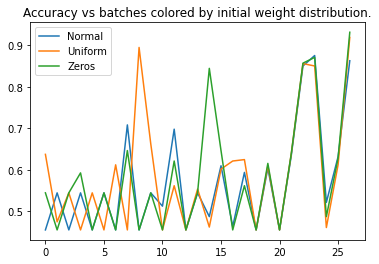

In [16]:
plt.plot(np.arange(x_train.shape[0]//batch_size),np.array(accuracies[0]), label = "Normal")
plt.plot(np.arange(x_train.shape[0]//batch_size),np.array(accuracies[1]), label = "Uniform")
plt.plot(np.arange(x_train.shape[0]//batch_size),np.array(accuracies[2]), label = "Zeros")
plt.title("Accuracy vs batches colored by initial weight distribution.")
plt.legend()